## Long Short Term Memory (LSTM)
Long Short-Term Memory (LSTM) networks are the gold standard to building RNN’s in practice today and they have proven to be highly effective for sequence prediction problems. They rely on gated cells to track information throughout many time steps thereby learning long-term dependencies and overcoming the vanishing gradient problem.
LSTM are a modified version of recurrent neural networks well-suited to predict Classification model. LSTM will train the model using back-propagation, and will store useful past information while forgetting any information that is not.

In [1]:
#Importing  the Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
#Import dataset
data = load_breast_cancer()
label_names = data["target_names"]
labels = data["target"]
feature_names = data["feature_names"]
features = data["data"]

In [3]:
#display of the dataset
features.shape

(569, 30)

In [4]:
#convert the dataset to dataframe
df=pd.DataFrame(features,columns=feature_names)

In [5]:
#display of the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Display of the target variable
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
print(label_names)
print("Class label :", labels[0])
print(feature_names)
print(features[0], "\n")

['malignant' 'benign']
Class label : 0
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 



In [8]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(features, labels,
                                                          test_size=0.2,
                                                          random_state=42)

In [9]:
# Normalize Data
means = np.mean(train, axis=0)
stds = np.std(train, axis=0)
trainData = (train- means)/stds
testData = (test- means)/stds

In [10]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit the keras model on the dataset
model.fit(train, train_labels, epochs=10, batch_size=2)

Epoch 1/10
228/228 [==============================] - 27s 2ms/step - loss: 8.0468 - accuracy: 0.5609
Epoch 2/10
228/228 [==============================] - 0s 1ms/step - loss: 0.7481 - accuracy: 0.8055
Epoch 3/10
228/228 [==============================] - 0s 1ms/step - loss: 0.8691 - accuracy: 0.8073
Epoch 4/10
228/228 [==============================] - 0s 2ms/step - loss: 0.8274 - accuracy: 0.8370
Epoch 5/10
228/228 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.8866
Epoch 6/10
228/228 [==============================] - 0s 2ms/step - loss: 1.7239 - accuracy: 0.7407
Epoch 7/10
228/228 [==============================] - 0s 2ms/step - loss: 0.4732 - accuracy: 0.8613
Epoch 8/10
228/228 [==============================] - 0s 1ms/step - loss: 0.6919 - accuracy: 0.8534
Epoch 9/10
228/228 [==============================] - 0s 1ms/step - loss: 0.6173 - accuracy: 0.8534
Epoch 10/10
228/228 [==============================] - 0s 1ms/step - loss: 0.7945 - accuracy: 0.833

In [12]:
#prediction using the model
predictions = model.predict(test)

In [13]:
# evaluate the keras model
_, accuracy = model.evaluate(test,test_labels)
print('Accuracy: %.2f' % (accuracy*100))

4/4 [==============================] - 1s 2ms/step - loss: 0.1736 - accuracy: 0.9474
Accuracy: 94.74


In [14]:
#round the prediction
y_pred_test = [int(np.round(i)) for i in predictions]

In [15]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, roc_auc_score, confusion_matrix, classification_report

In [16]:
print(classification_report(test_labels,y_pred_test, digits=2))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       1.00      0.92      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.96      0.95       114
weighted avg       0.95      0.95      0.95       114



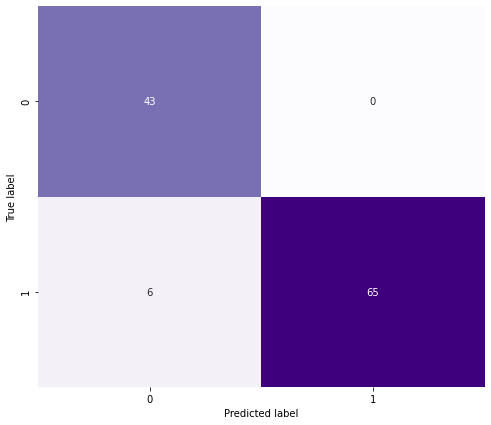

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
conf_mat = confusion_matrix(test_labels, y_pred_test)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Purples", cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
for i in range(10):
	print('%s => %d (expected %d)' % (test[i].tolist(), predictions[i], test_labels[i]))

[12.47, 18.6, 81.09, 481.9, 0.09965, 0.1058, 0.08005, 0.03821, 0.1925, 0.06373, 0.3961, 1.044, 2.497, 30.29, 0.006953, 0.01911, 0.02701, 0.01037, 0.01782, 0.003586, 14.97, 24.64, 96.05, 677.9, 0.1426, 0.2378, 0.2671, 0.1015, 0.3014, 0.0875] => 0 (expected 1)
[18.94, 21.31, 123.6, 1130.0, 0.09009, 0.1029, 0.108, 0.07951, 0.1582, 0.05461, 0.7888, 0.7975, 5.486, 96.05, 0.004444, 0.01652, 0.02269, 0.0137, 0.01386, 0.001698, 24.86, 26.58, 165.9, 1866.0, 0.1193, 0.2336, 0.2687, 0.1789, 0.2551, 0.06589] => 0 (expected 0)
[15.46, 19.48, 101.7, 748.9, 0.1092, 0.1223, 0.1466, 0.08087, 0.1931, 0.05796, 0.4743, 0.7859, 3.094, 48.31, 0.00624, 0.01484, 0.02813, 0.01093, 0.01397, 0.002461, 19.26, 26.0, 124.9, 1156.0, 0.1546, 0.2394, 0.3791, 0.1514, 0.2837, 0.08019] => 0 (expected 0)
[12.4, 17.68, 81.47, 467.8, 0.1054, 0.1316, 0.07741, 0.02799, 0.1811, 0.07102, 0.1767, 1.46, 2.204, 15.43, 0.01, 0.03295, 0.04861, 0.01167, 0.02187, 0.006005, 12.88, 22.91, 89.61, 515.8, 0.145, 0.2629, 0.2403, 0.0737, 0.2